In [53]:
import numpy as np
import pandas as pd

In [71]:
try:
    df18 = pd.read_csv('dataset/District_Wise_Mental_Health_Patients_2018-19.csv')
    df19 = pd.read_csv('dataset/District_Wise_Mental_Health_Patients_2019-20.csv')
    df20 = pd.read_csv('dataset/District_Wise_Mental_Health_Patients_2021-22.csv')
    print("Dataset loaded successfully!")
# except FileNotFoundError:
#     print("Error: The file was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset loaded successfully!


In [36]:
df18.head()

,SL No,DISTRICT,SEVERE_MENTAL_DISORDER_(SMD),COMMON_MENTAL _DISORDER(CMD),ALCOHOL_&_SUBSTANCE_ABUSE,CASES_REFERRED_TO_HIGHER_CENTRES,SUICIDE_ATTEMPT_CASES,Others,Total
0,1,BAGALKOTE,2833,2937,238,41,31,8393,14473
1,2,BANGALORE RURAL,3053,8975,1437,602,188,9499,23754
2,3,BANGALORE URBAN,7601,25663,4747,687,609,14648,53955
3,4,BELGAUM,10901,15740,3663,782,784,28139,60009
4,5,BELLARY,11153,10998,5585,26,3517,16576,47855


In [37]:
df18['Year']='2018'
df19['Year']='2019'
df20['Year']='2020'

In [38]:
total_nans=df18.isna().sum().sum()
print(total_nans)

0


In [39]:
print(df20.isnull().values.any())  # Checks for any missing values

False


In [40]:
try:
    merged_df=pd.concat([df18,df19,df20])
    print("Concatenation successful!")
    print(merged_df.head(2))

except KeyError as ke:
    print(f"LEy error: {ke}")
except ValueError as ve:
    print(f"ValueError: {ve}")
except TypeError as te:
    print(f"TypeError: {te}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Concatenation successful!
   SL No        DISTRICT   SEVERE_MENTAL_DISORDER_(SMD)  \
0      1        BAGALKOTE                          2833   
1      2  BANGALORE RURAL                          3053   

   COMMON_MENTAL _DISORDER(CMD)  ALCOHOL_&_SUBSTANCE_ABUSE  \
0                          2937                        238   
1                          8975                       1437   

   CASES_REFERRED_TO_HIGHER_CENTRES  SUICIDE_ATTEMPT_CASES  Others  Total  \
0                                41                     31    8393  14473   
1                               602                    188    9499  23754   

   Year  
0  2018  
1  2018  


In [41]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   SL No                             90 non-null     int64 
 1   DISTRICT                          90 non-null     object
 2   SEVERE_MENTAL_DISORDER_(SMD)      90 non-null     int64 
 3   COMMON_MENTAL _DISORDER(CMD)      90 non-null     int64 
 4   ALCOHOL_&_SUBSTANCE_ABUSE         90 non-null     int64 
 5   CASES_REFERRED_TO_HIGHER_CENTRES  90 non-null     int64 
 6   SUICIDE_ATTEMPT_CASES             90 non-null     int64 
 7   Others                            90 non-null     int64 
 8   Total                             90 non-null     int64 
 9   Year                              90 non-null     object
dtypes: int64(8), object(2)
memory usage: 7.7+ KB


In [42]:
try:
    if merged_df.isnull().values.any():
        raise ValueError("Missing data detected!")
    print("No missing data.")
except ValueError as ve:
    print(f"Error: {ve}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

No missing data.


In [43]:
merged_df.columns=merged_df.columns.str.strip()
print(merged_df.columns)

Index(['SL No', 'DISTRICT', 'SEVERE_MENTAL_DISORDER_(SMD)',
       'COMMON_MENTAL _DISORDER(CMD)', 'ALCOHOL_&_SUBSTANCE_ABUSE',
       'CASES_REFERRED_TO_HIGHER_CENTRES', 'SUICIDE_ATTEMPT_CASES', 'Others',
       'Total', 'Year'],
      dtype='object')


In [44]:
try:
    merged_df.to_csv('districtWiseMentalHealth_18to20.csv', index=False, encoding='utf-8')
    print("DataFrame exported to csv")
except IOError as ioe:
    print(f"IOError: There was an issue writing the file. Details: {ioe}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

DataFrame exported to csv


<AxesSubplot:title={'center':'Alcoholic cases'}, xlabel='DISTRICT'>

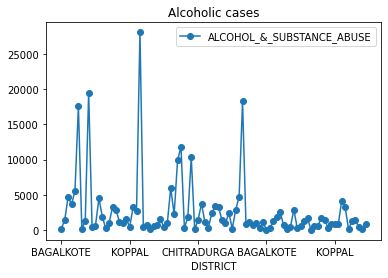

In [45]:
merged_df.plot(x='DISTRICT', y='ALCOHOL_&_SUBSTANCE_ABUSE', kind='line', marker='o', title='Alcoholic cases')

In [55]:
time_series_data = pd.read_csv('districtWiseMentalHealth_18to20.csv')

In [56]:
time_series_data.columns

Index(['SL No', 'DISTRICT', 'SEVERE_MENTAL_DISORDER_(SMD)',
       'COMMON_MENTAL _DISORDER(CMD)', 'ALCOHOL_&_SUBSTANCE_ABUSE',
       'CASES_REFERRED_TO_HIGHER_CENTRES', 'SUICIDE_ATTEMPT_CASES', 'Others',
       'Total', 'Year'],
      dtype='object')

In [57]:
time_series_data.head()

,SL No,DISTRICT,SEVERE_MENTAL_DISORDER_(SMD),COMMON_MENTAL _DISORDER(CMD),ALCOHOL_&_SUBSTANCE_ABUSE,CASES_REFERRED_TO_HIGHER_CENTRES,SUICIDE_ATTEMPT_CASES,Others,Total,Year
0,1,BAGALKOTE,2833,2937,238,41,31,8393,14473,2018
1,2,BANGALORE RURAL,3053,8975,1437,602,188,9499,23754,2018
2,3,BANGALORE URBAN,7601,25663,4747,687,609,14648,53955,2018
3,4,BELGAUM,10901,15740,3663,782,784,28139,60009,2018
4,5,BELLARY,11153,10998,5585,26,3517,16576,47855,2018


In [58]:
# time_series_data.set_index('Year',inplace=True)  //reset_index

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [60]:
time_series_data.reset_index(inplace=True)

In [62]:
# errors='coerce' so that if the Year column contains any invalid or non-year value then set them to NaT
time_series_data['Year'] = pd.to_datetime(time_series_data['Year'], errors='coerce')

In [63]:
#linear regression ,  
#Independent variable (Year) and dependent variable (Total cases)
X = np.array(time_series_data['Year'].dt.year).reshape(-1, 1)
y = time_series_data['SUICIDE_ATTEMPT_CASES'].values 

In [64]:
time_series_data.isnull().sum()
nan_rows = time_series_data[time_series_data.isnull().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [index, SL No, DISTRICT, SEVERE_MENTAL_DISORDER_(SMD), COMMON_MENTAL _DISORDER(CMD), ALCOHOL_&_SUBSTANCE_ABUSE, CASES_REFERRED_TO_HIGHER_CENTRES, SUICIDE_ATTEMPT_CASES, Others, Total, Year]
Index: []


In [65]:
#Fit
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [66]:
years_extended = np.array([2018, 2019, 2020, 2021]).reshape(-1, 1)
predicted_cases = model.predict(years_extended)


In [67]:
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y, model.predict(X))  # R-squared value for model performance
mse = mean_squared_error(y, model.predict(X))  # Mean Squared Error
print("r2: ",r2," and mse:",mse)

r2:  0.0  and mse: 1351196.067777778


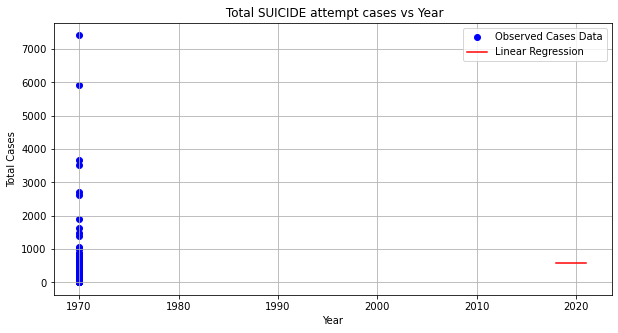

In [72]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, color='blue', label='Observed Cases Data') 
plt.plot(years_extended, predicted_cases, color='red', label='Linear Regression')
plt.title(' Total SUICIDE attempt cases vs Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()


In [73]:
print(f"Regression Coefficient (Slope): {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared Value: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Predicted cases for 2021 to 2023: {predicted_cases[-3:]}")


Regression Coefficient (Slope): 0.0
Intercept: 596.7666666666667
R-squared Value: 0.0
Mean Squared Error (MSE): 1351196.067777778
Predicted cases for 2021 to 2023: [596.76666667 596.76666667 596.76666667]
